 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [90]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [91]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_return_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_return_df.sort_index(ascending = True)
whale_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [92]:
# Count nulls
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [93]:
# Drop nulls
whale_return_df.dropna(inplace = True)
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [94]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col= "Date", parse_dates = True, infer_datetime_format=True)

In [95]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [96]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [97]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates = True, infer_datetime_format=True)

In [98]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [99]:
# Fix Data Types
sp500_df["Close"]= sp500_df["Close"].str.replace('$','').astype("float")
sp500_df.sort_index(inplace = True)
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [100]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [101]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace = True)


In [102]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"SP500"}, inplace = True)
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [103]:
# Concatenate all DataFrames into a single DataFrame
df_combined_ret = pd.concat([whale_return_df, algo_df,sp500_daily_returns], axis = "columns",join = "inner")
df_combined_ret.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

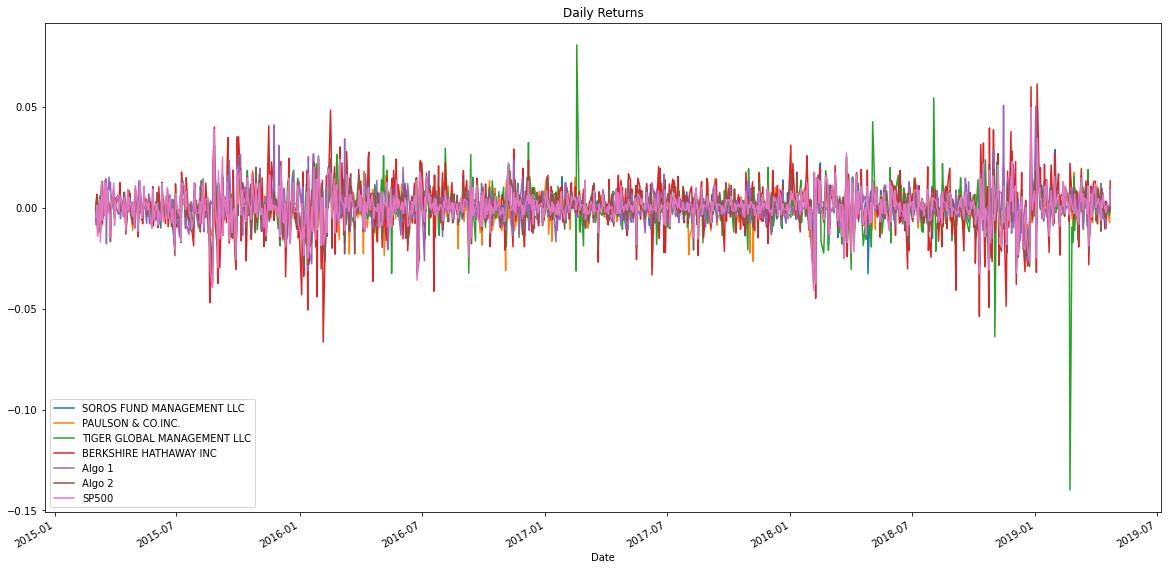

In [104]:
# Plot daily returns
df_combined_ret.plot(title = "Daily Returns", figsize = (20,10))

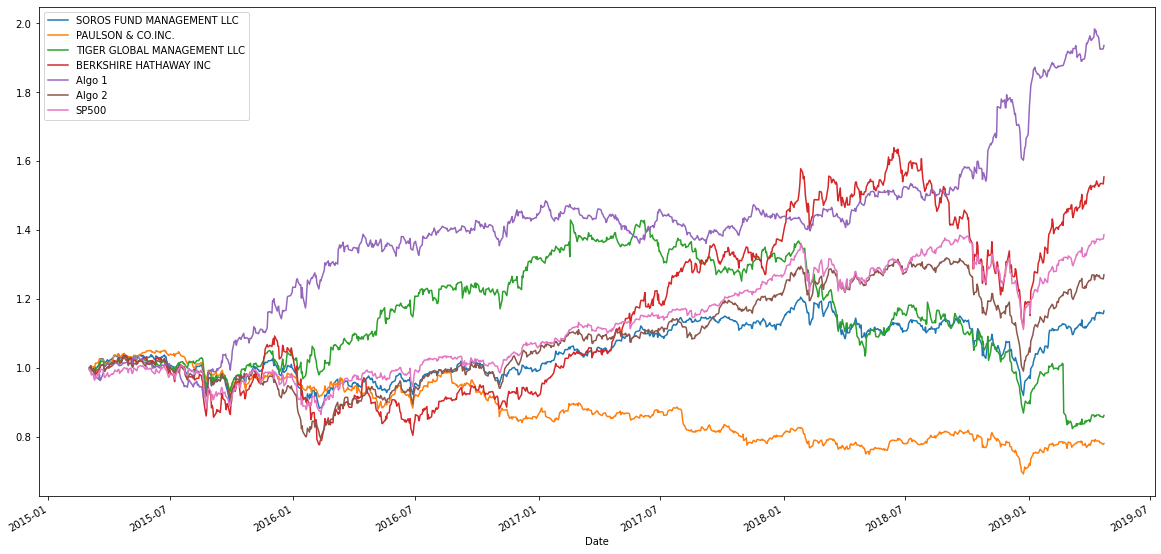

In [105]:
# Plot cumulative returns
df_cum_ret = (1+ df_combined_ret).cumprod()
df_cum_ret.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

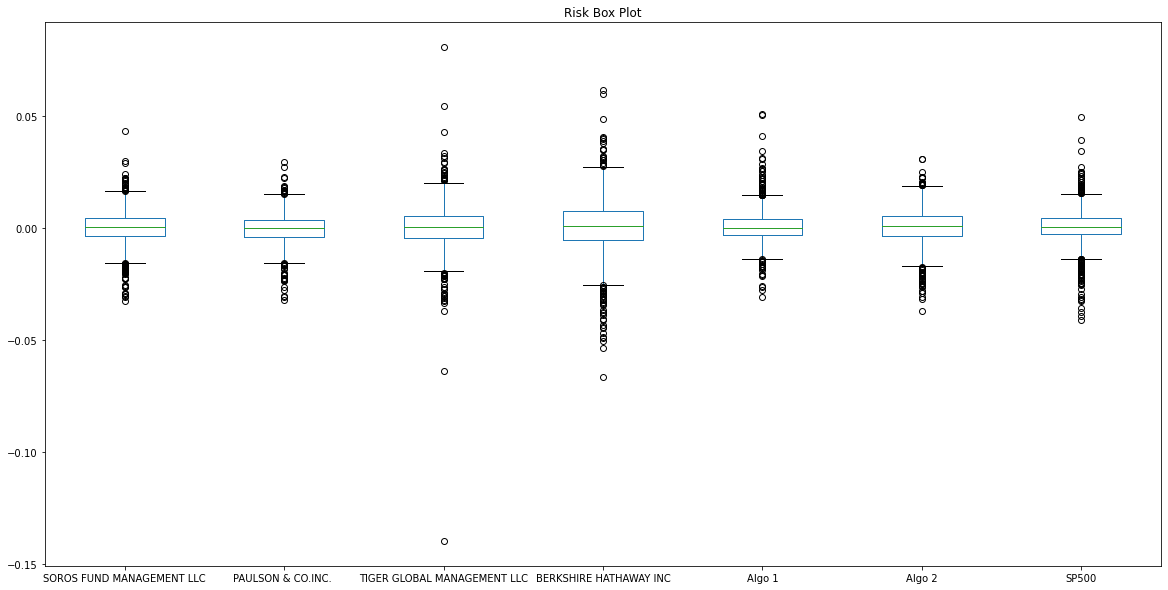

In [106]:
# Box plot to visually show risk
df_combined_ret.plot(kind="box", figsize=(20,10), title="Risk Box Plot")

In [107]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
df_daily_std =pd.DataFrame(df_combined_ret.std())
df_daily_std.rename(columns={0:"STD"}, inplace = True)
df_daily_std.sort_index(ascending=True)


,STD
Algo 1,0.007620
Algo 2,0.008342
BERKSHIRE HATHAWAY INC,0.012919
PAULSON & CO.INC.,0.007023
SOROS FUND MANAGEMENT LLC,0.007895
SP500,0.008554
TIGER GLOBAL MANAGEMENT LLC,0.010894


In [108]:
# Determine which portfolios are riskier than the S&P 500
greater_sp500_std = df_daily_std[df_daily_std["STD"] > df_daily_std.loc["SP500", "STD"]]
greater_sp500_std.head()

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [109]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_daily_std*np.sqrt(252)
annualized_std


,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

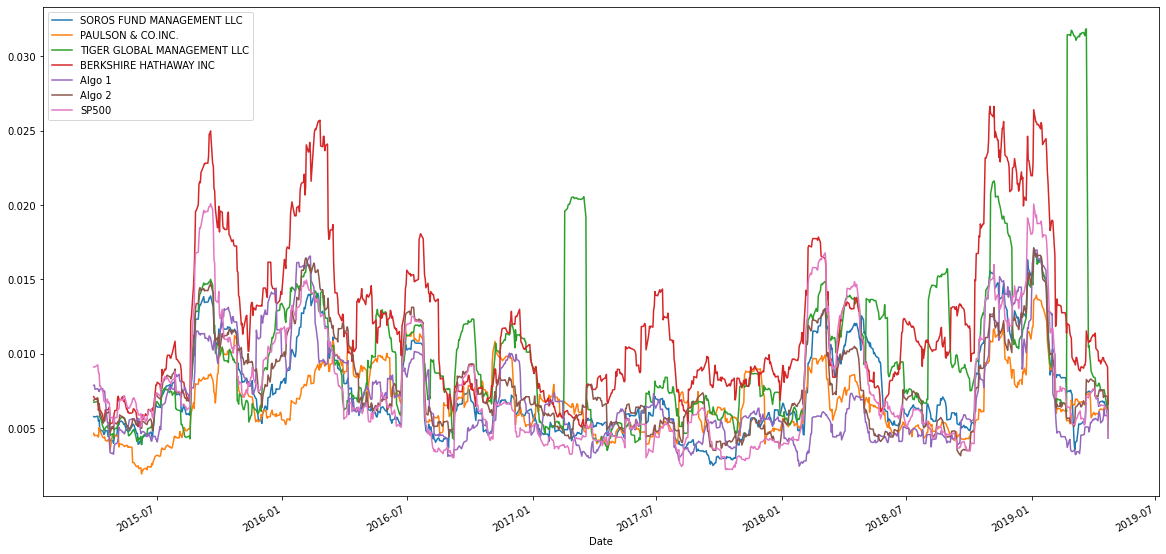

In [115]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_rolling_21win = df_combined_ret.rolling(window = 21).std()
sp500_rolling_21win.plot(figsize = (20,10))

In [111]:
# Construct a correlation table
correlation_tbl = pd.DataFrame(round(df_combined_ret.corr(),2))
correlation_tbl

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.00,0.70,0.56,0.75,0.32,0.83,0.84
PAULSON & CO.INC.,0.70,1.00,0.43,0.55,0.27,0.68,0.67
TIGER GLOBAL MANAGEMENT LLC,0.56,0.43,1.00,0.42,0.16,0.51,0.62
BERKSHIRE HATHAWAY INC,0.75,0.55,0.42,1.00,0.29,0.69,0.75
Algo 1,0.32,0.27,0.16,0.29,1.00,0.29,0.28
Algo 2,0.83,0.68,0.51,0.69,0.29,1.00,0.86
SP500,0.84,0.67,0.62,0.75,0.28,0.86,1.00


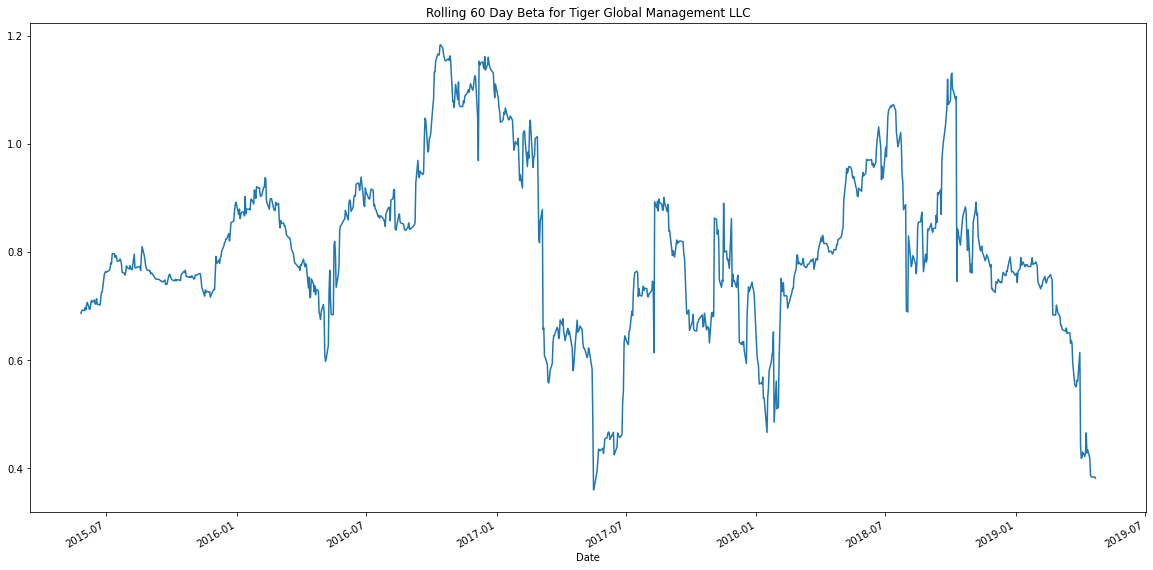

In [125]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = df_combined_ret['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(df_combined_ret['SP500'])
variance = df_combined_ret['SP500'].rolling(window=60).var()
beta = covariance / variance
beta.plot(figsize=(20,10), title="Rolling 60 Day Beta for Tiger Global Management LLC")

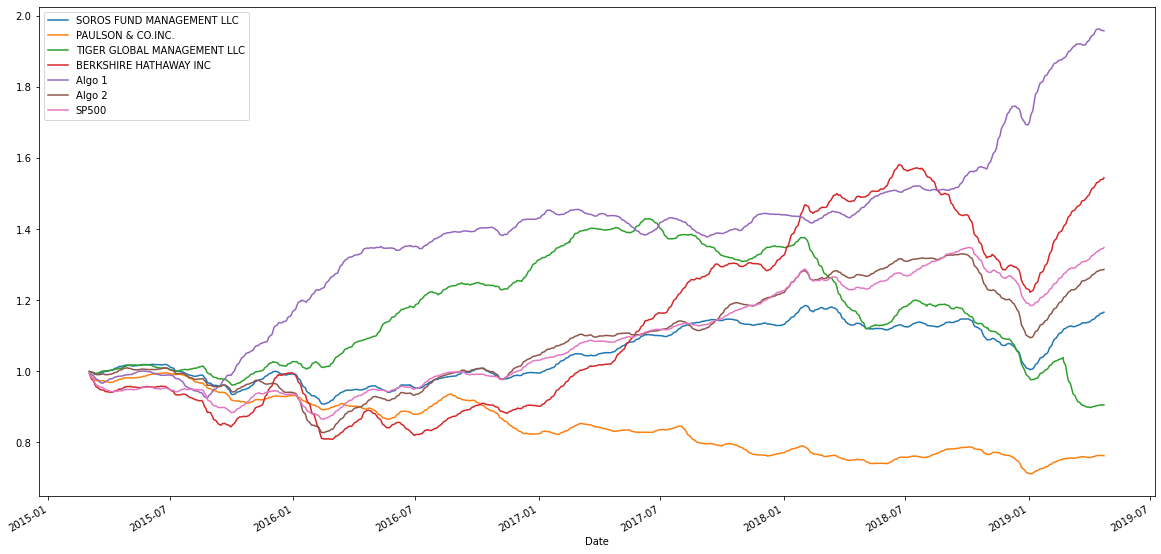

In [128]:
# Calculate a rolling window using the exponentially weighted moving average. 
df_combined_ret_wma = df_combined_ret.ewm(span = 21,adjust = False).mean()
(1+df_combined_ret_wma).cumprod().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [131]:
# Calculate annualized Sharpe Ratios
df_sharpe_ratios = df_combined_ret.mean()*252/(df_combined_ret.std()*np.sqrt(252))
df_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

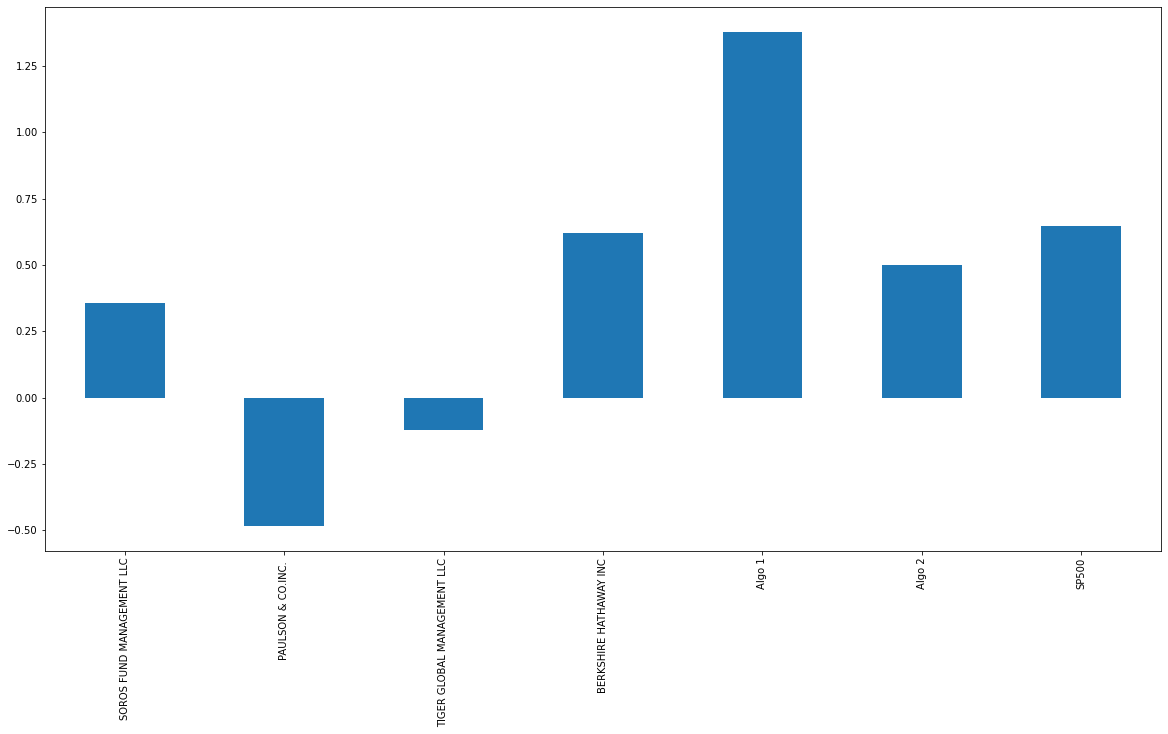

In [132]:
# Visualize the sharpe ratios as a bar plot
df_sharpe_ratios.plot(kind="bar", figsize=(20,10)) 

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [193]:
# Read the first stock
df_GOOG_path = Path("Resources/goog_historical.csv")
df_GOOG_price = pd.read_csv(df_GOOG_path, index_col="Trade DATE", parse_dates = True, infer_datetime_format = True)
df_GOOG_price.rename(columns = {"NOCP":"GOOG"}, inplace = True)
df_GOOG_price.drop(columns=["Symbol"], inplace=True)


df_GOOG_price.head()


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [194]:
# Read the second stock
df_AAPL_path = Path("Resources/aapl_historical.csv")
df_AAPL_price = pd.read_csv(df_AAPL_path, index_col="Trade DATE", parse_dates = True, infer_datetime_format = True)
df_AAPL_price.rename(columns = {"NOCP":"AAPL"}, inplace = True)
df_AAPL_price.drop(columns=["Symbol"], inplace=True)
df_AAPL_price.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [195]:
# Read the third stock
df_COST_path = Path("Resources/cost_historical.csv")
df_COST_price = pd.read_csv(df_COST_path, index_col="Trade DATE", parse_dates = True, infer_datetime_format = True)
df_COST_price.rename(columns = {"NOCP":"COST"}, inplace = True)
df_COST_price.drop(columns=["Symbol"], inplace=True)
df_COST_price.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [196]:
# Concatenate all stocks into a single DataFrame
df_all_prices = pd.concat([df_GOOG_price, df_AAPL_price, df_COST_price], axis = 1, join = "inner")
df_all_prices.sort_index(ascending=True)
df_all_prices.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [197]:
# Reset the index
df_all_prices.index.normalize()

DatetimeIndex(['2019-05-09', '2019-05-08', '2019-05-07', '2019-05-06',
               '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-05-11'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [199]:
# Pivot so that each column of prices represents a unique symbol
df_all_prices.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [200]:
# Drop Nulls
df_all_prices.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [217]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

df_portfolio = df_all_prices.dot(weights)
df_portfolio_return = df_portfolio.pct_change()
df_portfolio_return.dropna(inplace = True)
df_portfolio_return.head()

Trade DATE
2019-05-08    0.002452
2019-05-07    0.004117
2019-05-06    0.015435
2019-05-03   -0.000201
2019-05-02   -0.016641
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [227]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
complete_portfolio = pd.concat([df_portfolio_return, df_combined_ret], axis = 1, join = "inner")
complete_portfolio.rename(columns = {0:"My Portfolio"}, inplace = True)
complete_portfolio.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-23,0.003793,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


In [228]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
complete_portfolio.dropna(inplace =True)
complete_portfolio.sort_index(ascending=True)
complete_portfolio.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-23,0.003793,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [231]:
# Risk
complete_portfolio_std = pd.DataFrame(complete_portfolio.std()).rename(columns = {0:"STD"})
complete_portfolio_std.sort_index(ascending=True)

,STD
Algo 1,0.008405
Algo 2,0.008773
BERKSHIRE HATHAWAY INC,0.015539
My Portfolio,0.014377
PAULSON & CO.INC.,0.007338
SOROS FUND MANAGEMENT LLC,0.009226
SP500,0.009559
TIGER GLOBAL MANAGEMENT LLC,0.014619


In [239]:
# Rolling STD
complete_portfolio_std_rolling_60 = complete_portfolio.rolling(window = 60).std()
complete_portfolio_std_rolling_60.dropna(inplace = True)
complete_portfolio_std_rolling_60.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-01-28,0.010037,0.006631,0.006119,0.019658,0.009860,0.004993,0.006588,0.006115
2019-01-25,0.010247,0.006754,0.006253,0.019666,0.010059,0.004961,0.006611,0.006109
2019-01-24,0.010286,0.006753,0.006229,0.019666,0.010124,0.004979,0.006615,0.006108
2019-01-23,0.010303,0.006759,0.006229,0.019665,0.010124,0.005111,0.006630,0.006109
2019-01-22,0.010301,0.007049,0.006369,0.019682,0.010621,0.004922,0.006792,0.006422


In [242]:
# Annualized Sharpe Ratios
trading_days = 252
sharpe_ratios =complete_portfolio.mean()*trading_days/(complete_portfolio.std()*np.sqrt(trading_days))
sharpe_ratios.head()

My Portfolio                  -0.551199
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
dtype: float64

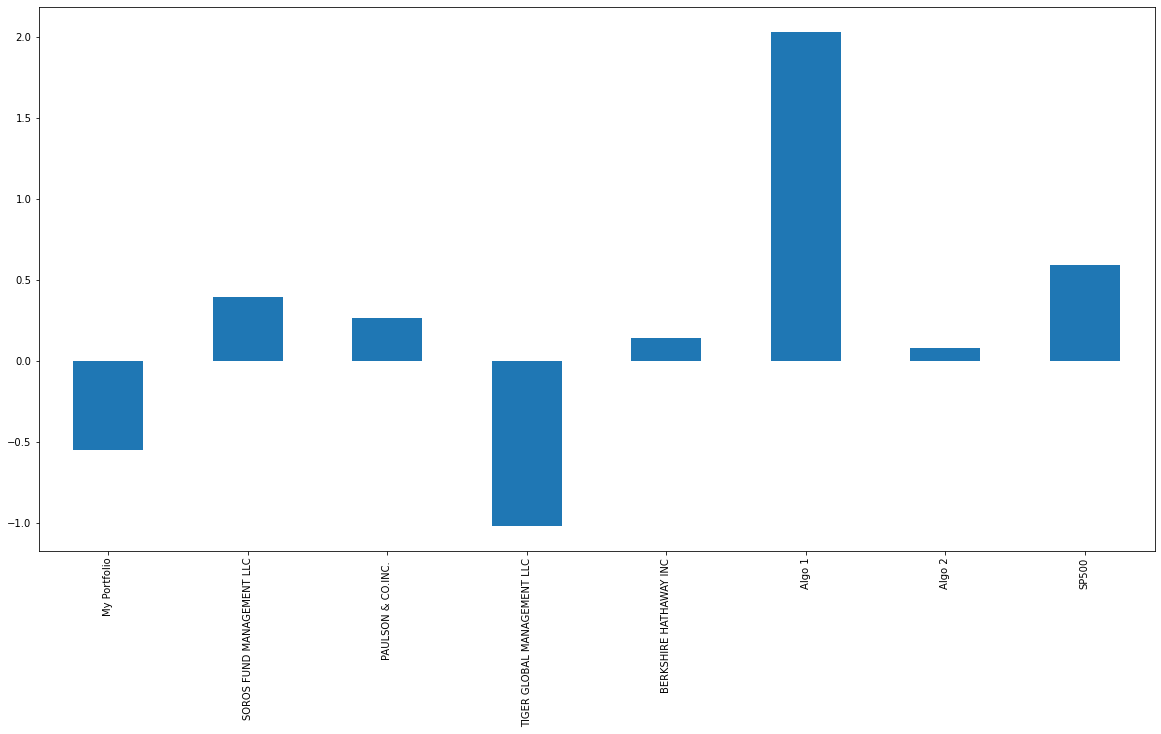

In [246]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10))

In [248]:
# Create a correlation analysis
correlation_port= complete_portfolio.corr()
correlation_port.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
My Portfolio,1.000000,0.093136,0.057516,0.035406,0.044662,0.058859,0.089097,0.107647
SOROS FUND MANAGEMENT LLC,0.093136,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089
PAULSON & CO.INC.,0.057516,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696
TIGER GLOBAL MANAGEMENT LLC,0.035406,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095
BERKSHIRE HATHAWAY INC,0.044662,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968


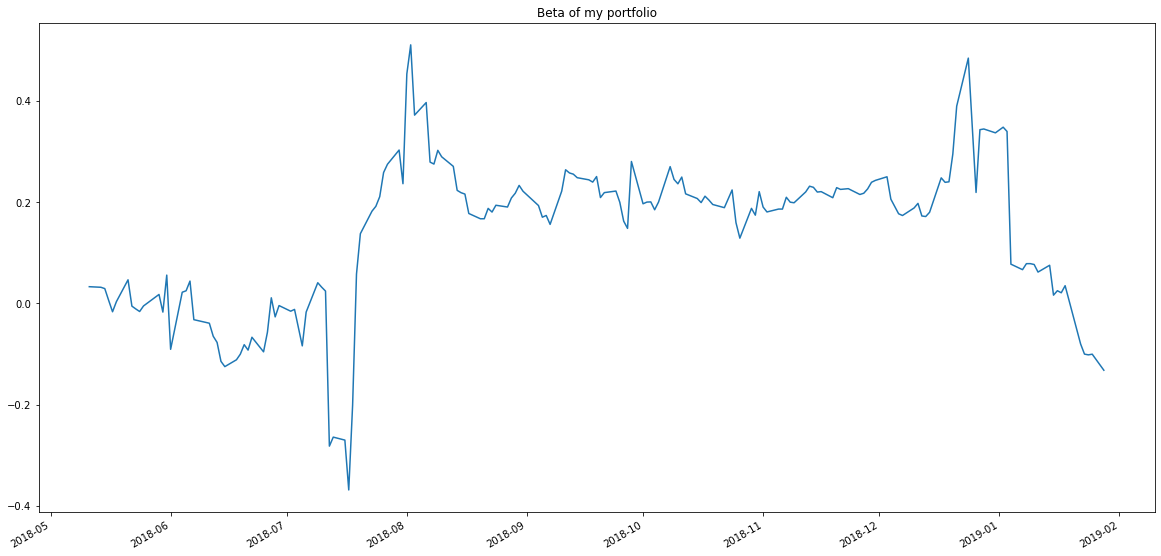

In [253]:
# Beta
covariance = complete_portfolio["My Portfolio"].rolling(window=60).cov(complete_portfolio['SP500'])
variance = complete_portfolio['SP500'].rolling(window=60).var()
beta = covariance / variance

beta.plot(figsize=(20,10), title="Beta of my portfolio")